# Aula 03 - Séries Temporais

# Suavização por média móvel

### Prof. Dr. Vitor Alex Oliveira Alves

# Filtro média móvel

Considere uma sequência de regsitros temnporais $\{x[nT]\}=\{x[n]\}$. Um sistema do tipo média móvel é definido pela equação:

$$y[n]=\frac{1}{M_1+M_2+1}\sum_{k=-M_1}^{M_2}x[n-k]=$$
$$=\frac{1}{M_1+M_2+1}(x[n+M_1]+x[n+M_1-1]+\cdots+x[n]+x[n-1]+\cdots+x[n-M_2])$$

O sistema calcula o n-ésimo registro da sequência de saída $y[n]$ como a média de $(M_1+M_2+1)$ registros da sequência de entrada. A figura abaixo mostra uma sequência de entrada como função de $k$ e os registros envolvidos no cálculo da amostra de saída $y[n]$ para $n=7$, $M_1=0$ e $M_2=5$.

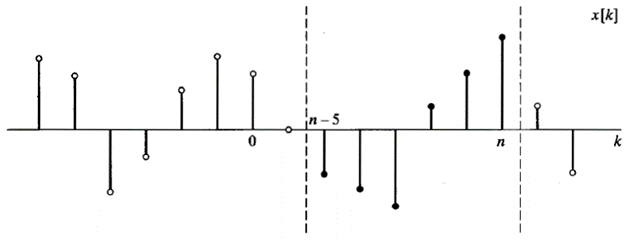

A amostra de saída $y[7]$ é igual a um sexto da soma de todas as amostras entre as linhas verticais pontilhadas. Para o cálculo de $y[8]$, ambas linhas pontilhadas devem se mover uma amostra para a direita.

# Exemplo de análise - Temperatura global média

Vamos analisar alguns casos de suavização (filtragem) dos dados de uma série temporal utilizando o conceito de média móvel (*moving average filter*).

Para isso, consideremos a série temporal que registra os desvios da temperatura média global terra-oceano (tomando como referência a média no período de 1951-1980), para os anos de 1880-2015.

In [4]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Padronização do tamanho das figuras
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

In [ ]:
# Montagem do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# leitura do arquivo - temp_global.csv
df_temp = pd.read_csv('/content/drive/MyDrive/Datasets/temp_global.csv')
display(df_temp)

,x
1,-0.20
2,-0.11
3,-0.10
4,-0.20
5,-0.28
...,...
132,0.60
133,0.63
134,0.66
135,0.75


Note que não há o registro das datas de aferição no DataFrame temperatura (existye apenas uma contagem de tais registros). Vamos então criar esses registros anuais, começando no ano de 1880.

In [18]:
# Criação dos registros temporais 
indice = pd.date_range(start='1880 Jan 1', periods=len(df_temp), freq='Y')
print(indice)

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', length=136, freq='A-DEC')


Nesse ponto, podemos criar a série temporal desejada.

1880-12-31   -0.20
1881-12-31   -0.11
1882-12-31   -0.10
1883-12-31   -0.20
1884-12-31   -0.28
              ... 
2011-12-31    0.60
2012-12-31    0.63
2013-12-31    0.66
2014-12-31    0.75
2015-12-31    0.87
Freq: A-DEC, Length: 136, dtype: float64


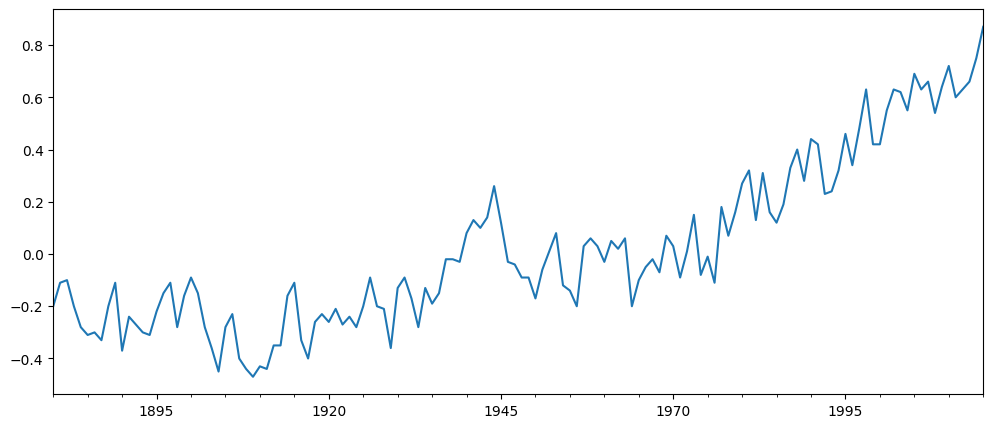

In [22]:
# Criação e plotagem da série temporal
serie_temp = pd.Series(df_temp['x'].values, index=indice)
print(serie_temp)
serie_temp.plot()
plt.show()

Agora vamos aplicar um filtro de média móvel na série temporal dos desvios de tgemperatura. O parâmetro de sintonia desse filtro é o "janelamento", ou seja, a quantidade de dados consecutivos a qual será aplicada o operador média.

Assim, à medida que percorremos os dados, a média se movimenta mantrendo constante o janelamento, ao mesmo tempo que atenua variações bruscas ocorridas no período.

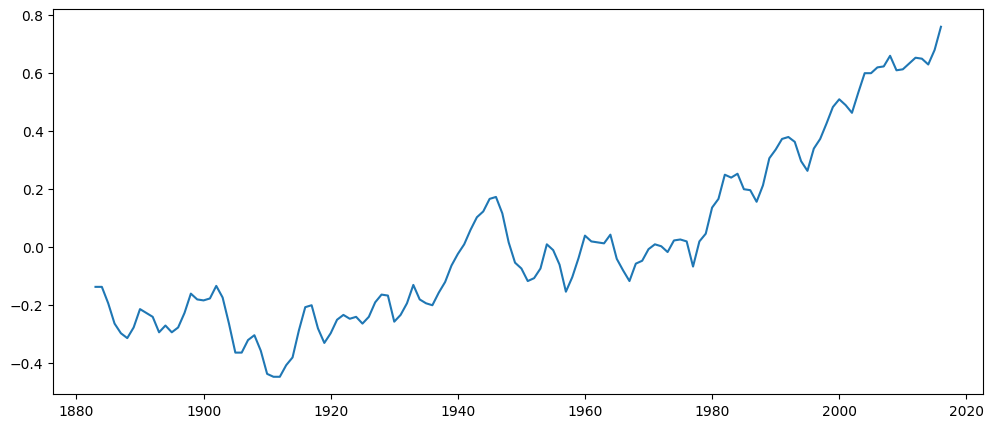

In [26]:
# Aplicando um filtro de média móvel com janelamento de 3 anos
mov_avg_3anos = serie_temp.rolling(window=3)
mov_avg_3anos = mov_avg_3anos.mean()
plt.plot(mov_avg_3anos)
plt.show()

É interessante representar a série original em conjunto com sua versão filtrada pela média móvel de 3 anos.

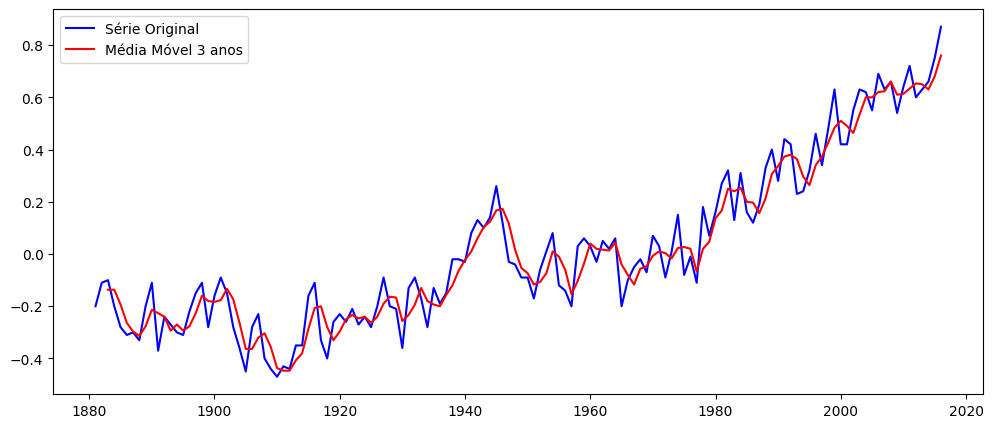

In [27]:
# Série original x Série filtrada
plt.plot(serie_temp, color='blue', label='Série Original')
plt.plot(mov_avg_3anos,color='red', label='Média Móvel 3 anos')
plt.legend(loc='best')
plt.show()

Vamos analisar o efeito de suavização causado por outros janelamentos de média móvel.

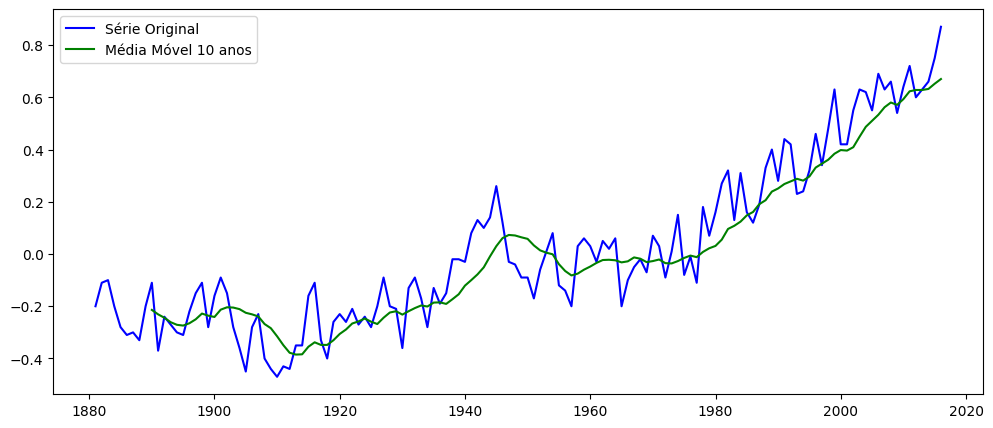

In [28]:
# Janelamento de 10 anos
mov_avg_10anos = serie_temp.rolling(window=10)
mov_avg_10anos = mov_avg_10anos.mean()
# Série original x Série filtrada
plt.plot(serie_temp, color='blue', label='Série Original')
plt.plot(mov_avg_10anos, color='green', label='Média Móvel 10 anos')
plt.legend(loc='best')
plt.show()

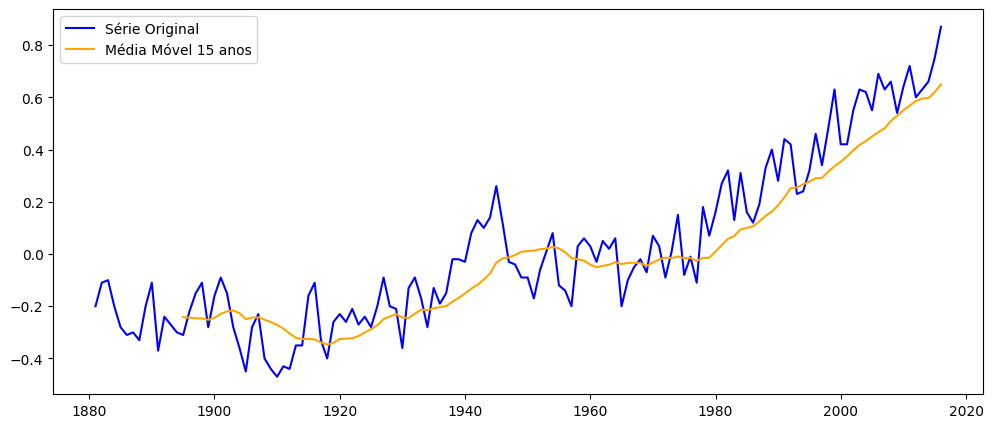

In [29]:
# Janelamento de 15 anos
mov_avg_15anos = serie_temp.rolling(window=15)
mov_avg_15anos = mov_avg_15anos.mean()
# Série original x Série filtrada
plt.plot(serie_temp, color='blue', label='Série Original')
plt.plot(mov_avg_15anos, color='orange', label='Média Móvel 15 anos')
plt.legend(loc='best')
plt.show()

No gráfico a seguir, são vistas a série temporal original e suas versões suavizadas pela aplicação de filtro de média móvel com os janelamentos de 3, 10 e 15 anos.

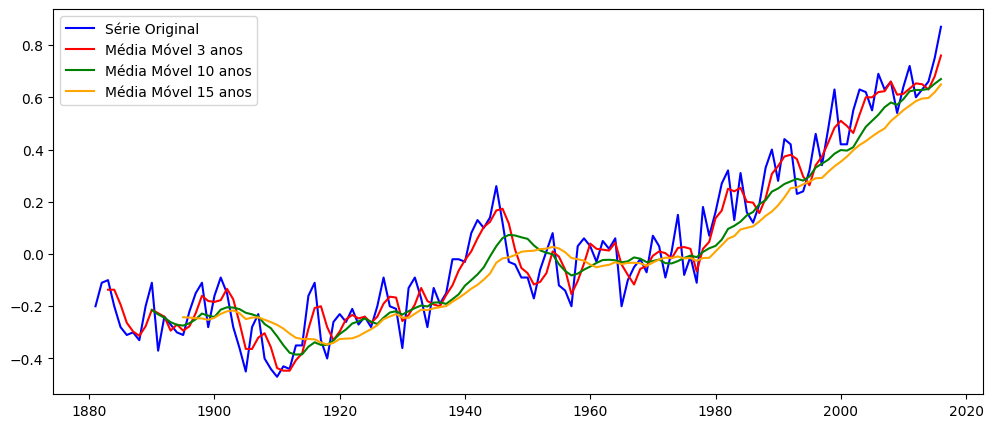

In [30]:
# Plotagem da série original e versões filtradas
plt.plot(serie_temp, color='blue', label='Série Original')
plt.plot(mov_avg_3anos, color='red', label='Média Móvel 3 anos');
plt.plot(mov_avg_10anos, color='green', label='Média Móvel 10 anos');
plt.plot(mov_avg_15anos, color='orange', label='Média Móvel 15 anos');
plt.legend(loc='best')
plt.show()

É importante ressaltar que a aplicação do filtro de média móvel pressupõe a perda de dados no início da filtragem. De fato, o número de registros perdidos é igual ao janelamento empregado. Cheque esse efeito no gráfico acima!

Para que isso não ocorra, acrescentamos o parâmetro *center* ao método *rolling*. Dessa forma, a perda de informação é dividida entre o início e o fim dos registros disponíveis.

In [31]:
# Filtragem com média móvel centrada: 3 anos
mov_avg_3anos_center = serie_temp.rolling(window=3, center=True)
mov_avg_3anos_center = mov_avg_3anos_center.mean()

# Filtragem com média móvel centrada: 10 anos
mov_avg_10anos_center = serie_temp.rolling(window=10, center=True)
mov_avg_10anos_center = mov_avg_10anos_center.mean()

# Filtragem com média móvel centrada: 15 anos
mov_avg_15anos_center = serie_temp.rolling(window=15, center=True)
mov_avg_15anos_center = mov_avg_15anos_center.mean()

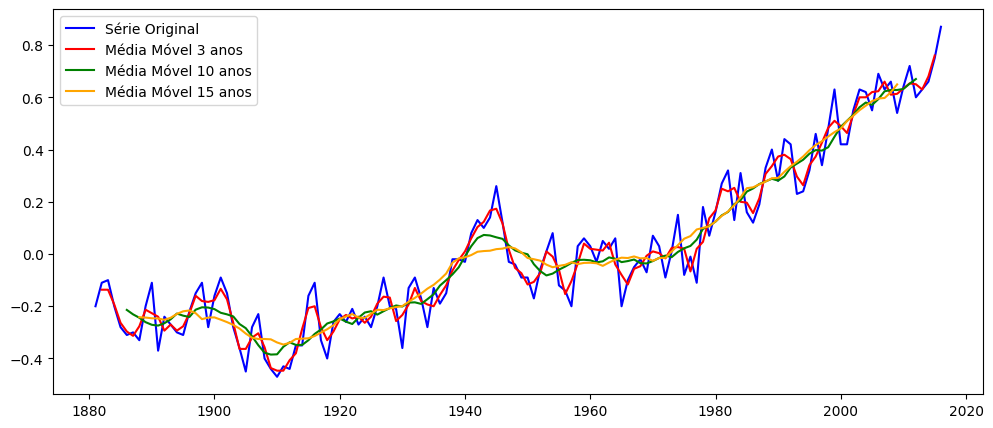

In [32]:
# Plotagem da série original e versões filtradas (centradas)
plt.plot(serie_temp, color='blue', label='Série Original')
plt.plot(mov_avg_3anos_center, color='red', label='Média Móvel 3 anos');
plt.plot(mov_avg_10anos_center, color='green', label='Média Móvel 10 anos');
plt.plot(mov_avg_15anos_center, color='orange', label='Média Móvel 15 anos');
plt.legend(loc='best')
plt.show()